In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
# Import Dataset
my_movies=pd.read_csv("C:/Users/Siri/Desktop/Excelr/Assignments/Association rules/my_movies.csv")
my_movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


# Pre-Processing
As the data is not in transaction formation 
We are using transaction Encoder

In [6]:
df=pd.get_dummies(my_movies)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [7]:
#1. Association rules with 10% Support and 70% confidence¶

In [9]:
# With 10% Support
frequent_itemsets=apriori(df,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,..."
1393,0.1,"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,..."
1394,0.1,"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,..."
1395,0.1,"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,..."


In [10]:
# with 70% confidence
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
64247,(V5_LOTR2),"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64248,(V2_LOTR1),"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64249,(Sixth Sense),"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64250,(V4_Green Mile),"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [21]:
## A leverage value of 0 indicates independence. Range will be [-1 1]
## A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [11]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(Sixth Sense, Green Mile, LOTR1, V5_LOTR2)","(Harry Potter1, V3_Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33437,"(Sixth Sense, V2_LOTR1, LOTR2)","(Harry Potter1, LOTR1, V4_Green Mile, V5_LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33415,"(Harry Potter1, V2_LOTR1, V4_Green Mile)","(Sixth Sense, LOTR2, LOTR1, V5_LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33416,"(Harry Potter1, V2_LOTR1, LOTR2)","(Sixth Sense, LOTR1, V4_Green Mile, V5_LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33417,"(Harry Potter1, V4_Green Mile, Sixth Sense)","(LOTR2, V2_LOTR1, LOTR1, V5_LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
1665,(Gladiator),"(Sixth Sense, Green Mile, V4_Green Mile)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
665,"(V1_Sixth Sense, Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
1735,(Gladiator),"(Sixth Sense, V1_Sixth Sense, V4_Green Mile)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
214,"(Sixth Sense, Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000


In [12]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
64247,(V5_LOTR2),"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64248,(V2_LOTR1),"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64249,(Sixth Sense),"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64250,(V4_Green Mile),"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


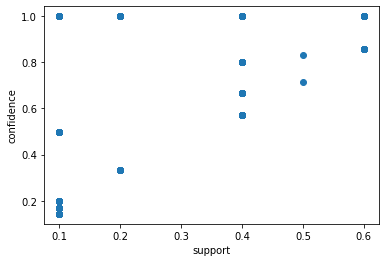

In [13]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

# 2. Association rules with 20% Support and 60% confidence

In [14]:
# With 20% Support
frequent_itemsets2=apriori(df,min_support=0.20,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(V3_Sixth Sense, Gladiator, Patriot, Sixth Sen..."
77,0.4,"(V3_Sixth Sense, Gladiator, Sixth Sense, V1_Gl..."
78,0.4,"(V3_Sixth Sense, Patriot, Sixth Sense, V1_Glad..."
79,0.4,"(V3_Sixth Sense, Gladiator, Patriot, V1_Gladia..."


In [15]:
# With 60% confidence
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.6)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(Gladiator),"(V3_Sixth Sense, Patriot, Sixth Sense, V1_Glad...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
650,(Patriot),"(V3_Sixth Sense, Gladiator, Sixth Sense, V1_Gl...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(Sixth Sense),"(V3_Sixth Sense, Gladiator, Patriot, V1_Gladia...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
652,(V1_Gladiator),"(V3_Sixth Sense, Gladiator, Patriot, Sixth Sen...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [23]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(Gladiator),"(V3_Sixth Sense, Patriot, Sixth Sense, V1_Glad...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
650,(Patriot),"(V3_Sixth Sense, Gladiator, Sixth Sense, V1_Gl...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(Sixth Sense),"(V3_Sixth Sense, Gladiator, Patriot, V1_Gladia...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
652,(V1_Gladiator),"(V3_Sixth Sense, Gladiator, Patriot, Sixth Sen...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


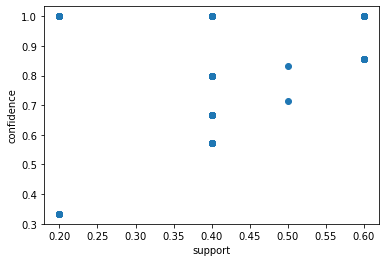

In [16]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

# 3. Association rules with 5% Support and 80% confidence

In [17]:
# With 5% Support
frequent_itemsets3=apriori(df,min_support=0.05,use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,..."
1393,0.1,"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,..."
1394,0.1,"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,..."
1395,0.1,"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,..."


In [18]:
# With 80% confidence
rules3=association_rules(frequent_itemsets3,metric='lift',min_threshold=0.8)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
64219,(V5_LOTR2),"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64220,(V2_LOTR1),"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64221,(Sixth Sense),"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64222,(V4_Green Mile),"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [19]:
rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
64219,(V5_LOTR2),"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64220,(V2_LOTR1),"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64221,(Sixth Sense),"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64222,(V4_Green Mile),"(Green Mile, V1_Sixth Sense, V3_Harry Potter1,...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


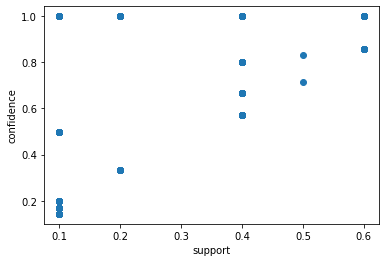

In [20]:
# visualization of obtained rule
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()